In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:

# Load train dataset
train_path = 'fraudTrain.csv'
df_train = pd.read_csv(train_path)

# Get a quick view on train dataset feature and value
print(df_train.head())

#Load test dataset
test_path = 'fraudTest.csv'
df_test = pd.read_csv(test_path)

# Get a quick view on test dataset feature and value
print(df_test.head())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [93]:
# Get dataframe shapes
print('Shape of train dataframe:', df_train.shape)
print('Shape of test dataframe:', df_test.shape)

# Get train data info: count, feature names, data types, missing data counts
print('------------------Train Dataframe info------------------')
print(df_train.info())

# Get statistical summaries for each feature
print('------------------Train Dataframe describe------------------')
print(df_train.describe())

Shape of train dataframe: (1296675, 23)
Shape of test dataframe: (555719, 23)
------------------Train Dataframe info------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  obje

In [94]:
# Check uniaue values of is_fraud column
print('\n Unique values:\n', df_train.is_fraud.unique())

# Cound unique values of is_fraud column
print('\n Count unique values:\n', df_train.is_fraud.value_counts())

# Calculate percentage of unique values of is_fraud column
print('\n Percentage of unique values:\n', df_train.is_fraud.value_counts(normalize=True))

# Create dataframe for statistics of fraud labels
df_fraud_stat = pd.DataFrame({'Class': df_train.is_fraud.unique(),
                             'Count': df_train.is_fraud.value_counts(),
                             'Percentage': df_train.is_fraud.value_counts(normalize=True)})
print('\n Dataframe for fraud labels:\n', df_fraud_stat)


 Unique values:
 [0 1]

 Count unique values:
 0    1289169
1       7506
Name: is_fraud, dtype: int64

 Percentage of unique values:
 0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

 Dataframe for fraud labels:
    Class    Count  Percentage
0      0  1289169    0.994211
1      1     7506    0.005789


In [95]:
# Concatenate the two datasets to perform the same data preprocessing
df_combined = pd.concat([df_train, df_test], axis=0)
print('\n Shape of combined dataframe:\n', df_combined.shape)

# Get a list of old feature names
old_feature_names = list(df_train.columns)
print('\n Old feature names:\n', old_feature_names)

# Create a new corresponding feature names
new_feature_names = ['index', 'transaction_time', 'account_number', 'merchant_name', 'category',
       'transaction_amount', 'first_name', 'last_name', 'gender', 'street', 'city', 'state', 'zip',
       'client_latitude', 'client_longitude', 'city_population', 'job', 'birthday', 'transaction_number', 'unix_time',
       'merchant_latitude', 'merchant_longitude', 'is_fraud']

# Create a dictionary to map the old feature names to the new ones
feature_name_dict = {old_feature_names[i]: new_feature_names[i] for i in range(len(old_feature_names))}
print('\n Dictionary of old-new feature names:\n', feature_name_dict)

# Edit col/feature name
df_combined = df_combined.rename(columns=feature_name_dict)
print('\n Combine dataframe with new feature names:\n', df_combined.head(2))


 Shape of combined dataframe:
 (1852394, 23)

 Old feature names:
 ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

 Dictionary of old-new feature names:
 {'Unnamed: 0': 'index', 'trans_date_trans_time': 'transaction_time', 'cc_num': 'account_number', 'merchant': 'merchant_name', 'category': 'category', 'amt': 'transaction_amount', 'first': 'first_name', 'last': 'last_name', 'gender': 'gender', 'street': 'street', 'city': 'city', 'state': 'state', 'zip': 'zip', 'lat': 'client_latitude', 'long': 'client_longitude', 'city_pop': 'city_population', 'job': 'job', 'dob': 'birthday', 'trans_num': 'transaction_number', 'unix_time': 'unix_time', 'merch_lat': 'merchant_latitude', 'merch_long': 'merchant_longitude', 'is_fraud': 'is_fraud'}

 Combine dataframe with new feature names:
    index     tr

In [96]:
import numpy as np
# Convert transaction_time from string to datetime type. Add transaction date, hour, month to combined dataframe
df_combined.transaction_time = pd.to_datetime(df_combined.transaction_time)
df_combined['transaction_date'] = df_combined.transaction_time.dt.strftime('%Y-%m-%d')
df_combined['transaction_hour'] = df_combined.transaction_time.dt.strftime('%H')
df_combined['transaction_month'] = df_combined.transaction_time.dt.strftime('%m')

# Convert transaction_birthday from string to datetime type. Add 'birthday_date' and 'age' features to combined dataframe
df_combined.birthday = pd.to_datetime(df_combined.birthday)
df_combined['birthday_date'] = df_combined.birthday.dt.strftime('%Y-%m-%d')
df_combined['age'] = (df_combined.transaction_time - df_combined.birthday).astype('timedelta64[Y]')

# calculate transaction distance 
distance_trans_longitude = df_combined.merchant_longitude - df_combined.client_longitude
distance_trans_lattitude = df_combined.merchant_latitude - df_combined.client_latitude
distance_trans = np.sqrt(distance_trans_longitude**2 + distance_trans_lattitude**2)

# Add distance features to combined dataframe
df_combined['transaction_longitude_distance'] = distance_trans_longitude
df_combined['transaction_lattitude_distance'] = distance_trans_lattitude
df_combined['transaction_distance'] = distance_trans

# Create age_interval function
def age_interval(x):
    """
    Binning age values to categorical ones with 5 categories:
    'Less than 20', 'Between 20 and 30', 'Between 30 and 40', 
    'Between 40 and 50', 'Between 50 and 60' and 'Larger than 60'
    """
    if x < 20:
        return "Less than 20" 
    elif x >=20 and x < 30:
        return "Between 20 and 30"
    elif x >=30 and x < 40:
        return "Between 30 and 40"
    elif x >=40 and x < 50:
     return "Between 40 and 50"
    elif x >=50 and x < 60:
        return "Between 50 and 60"
    else: 
        return "Larger than 60"

# Create rename function for gender feature
def gender_rename(x):
    """
        Rename gender value: 'M' to 'Male' 
        and 'F' to 'Female'
    """
    if x == 'M':
        return "Male" 
    else: 
        return "Female"
    
# Create 'age_intervals' 
df_combined['age_intervals'] = df_combined.age.map(lambda x : age_interval(x))

# Rename gender values
df_combined['gender'] = df_combined.gender.map(lambda x : gender_rename(x))   

In [97]:
# Get the length of the train dataset
train_samples_len = df_train.shape[0]

# Get preprocessed train and test dataframes
df_train_preprocessed = df_combined.iloc[:train_samples_len, :]
df_test_preprocessed = df_combined.iloc[train_samples_len:, :]

# Save the preprocessed dataframes into new corresponding csv files
df_train_preprocessed.to_csv('/Users/oreoluwa/Downloads/Credit Card Transactions Fraud Detection/df_train_preprocessed.csv')
df_test_preprocessed.to_csv('/Users/oreoluwa/Downloads/Credit Card Transactions Fraud Detection/df_test_preprocessed.csv')

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed train dataset
data_train_path = '/Users/oreoluwa/Downloads/Credit Card Transactions Fraud Detection/df_train_preprocessed.csv'
df = pd.read_csv(data_train_path)

# Get preprocessed train dataframe dedicated to fraud observations
df_fraud = df[df['is_fraud'] == 1]

# Display the shape of the datasets
print('Shape for preprocessed train dataset: \n', df.shape)
print('Shape for only-fraud train dataset: \n', df_fraud.shape)


Shape for preprocessed train dataset: 
 (1296675, 33)
Shape for only-fraud train dataset: 
 (7506, 33)


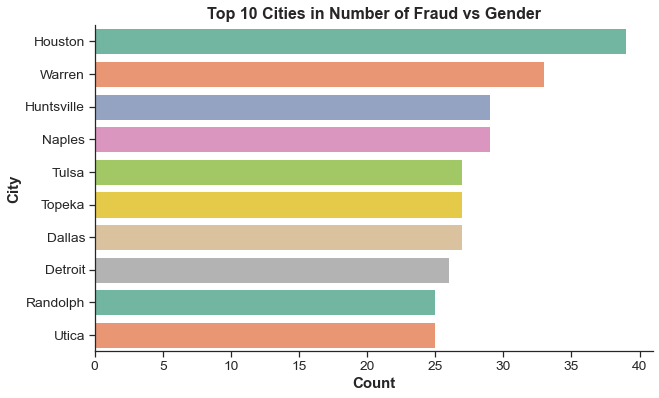

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Assuming df_fraud is the dataset containing only fraud data
city_counts = df_fraud['city'].value_counts().head(10)  # Top 10 cities based on fraud count

# Create a barplot with the count of fraud data by city
fig = plt.figure(figsize=(10, 6))

# Customize the theme and color palette
colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot for top 10 cities based on fraud, split by gender
sns.barplot(y=city_counts.index, x=city_counts.values, palette='Set2', orient='h')

# Set title, labels, and legend properties
plt.title('Top 10 Cities in Number of Fraud vs Gender', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('City', fontsize=15, fontweight='bold')

# Show the plot
plt.show()

# Ensure the directory exists before saving the plot
output_directory = './figs'
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Save the plot as a PNG file with 300 dpi
fig.savefig(f'{output_directory}/Top_10_Cities_in_Fraud_vs_Gender.png', dpi=300, bbox_inches='tight')


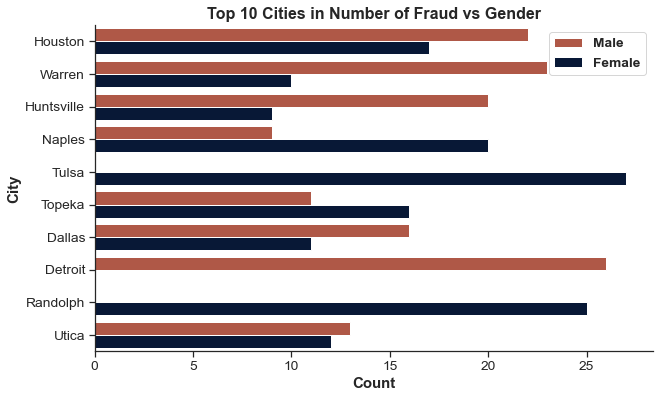

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_fraud is the dataset containing only fraud data
fig = plt.figure(figsize=(10,6))

# Customize theme, color palette, and plot settings
colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot for top 10 cities based on fraud, split by gender
g = sns.countplot(y='city',  # Ensure 'city' is a valid column in df_fraud
                  data=df_fraud,
                  hue='gender',  # Ensure 'gender' is a valid column
                  order=df_fraud['city'].value_counts().head(10).index)  # Get top 10 cities by fraud count

# Set title, labels, and legend
g.set_title('Top 10 Cities in Number of Fraud vs Gender', fontdict={'fontsize': 16, 'fontweight': 'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('City', fontsize=15, fontweight='bold')
g.legend(prop={'weight': 'bold'})

# Show the plot
plt.show()

# Optionally save the plot as a PNG file with 300 dpi
fig.savefig('./figs/Top_10_Cities_in_Fraud_vs_Gender.png', dpi=300, bbox_inches='tight')



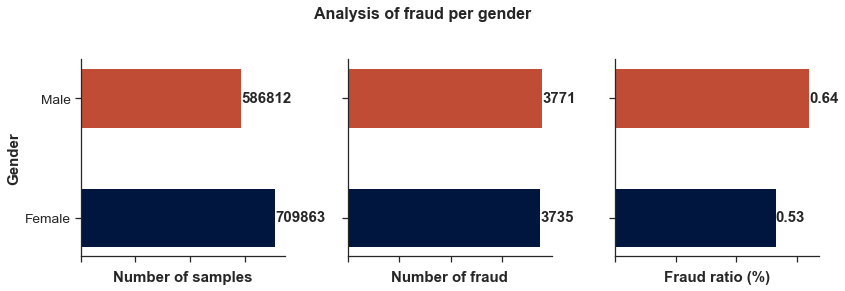

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_gender_is_fraud is already created as per the previous code

fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(12, 4))
colors = ["#00163E", "#C04C36"]

# Plot for 'count'
ax1.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['count'], 
         color=colors,
         height=0.5)
ax1.set_ylabel("Gender", weight='bold', fontsize=15)
ax1.set_xlabel('Number of samples', weight='bold', fontsize=15)
for index, value in enumerate(df_gender_is_fraud['count']):
    ax1.text(value, index, str(value), va='center', ha='left', weight='bold')

ax1.set_xticklabels([])

# Plot for 'Number of fraud'
ax2.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Number of fraud'], 
         color=colors,
         height=0.5)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.set_xlabel('Number of fraud', weight='bold', fontsize=15)
for index, value in enumerate(df_gender_is_fraud['Number of fraud']):
    ax2.text(value, index, str(value), va='center', ha='left', weight='bold')

# Plot for 'Fraud ratio'
ax3.barh(df_gender_is_fraud.gender,
         df_gender_is_fraud['Fraud ratio'], 
         color=colors,
         height=0.5)
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_xlabel('Fraud ratio (%)', weight='bold', fontsize=15)
for index, value in enumerate(df_gender_is_fraud['Fraud ratio']):
    ax3.text(value, index, str(value), va='center', ha='left', weight='bold')

fig.suptitle("Analysis of fraud per gender", weight='bold', fontsize=16, y=1.02)
fig.tight_layout()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Analysis_of_fraud_per_gender.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


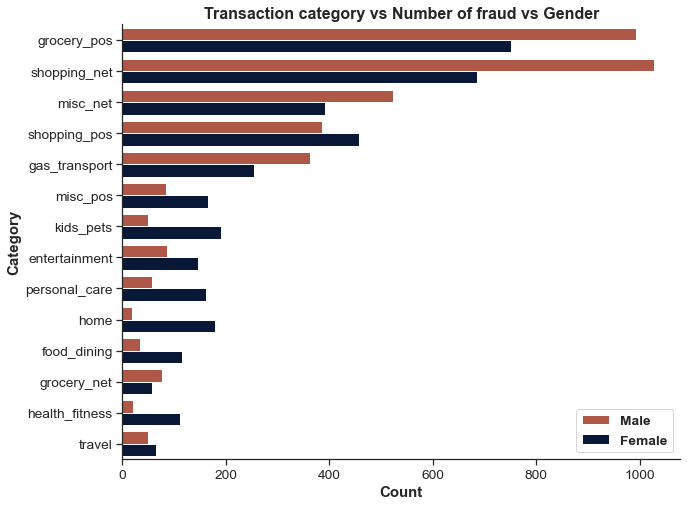

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))

# Customizing the appearance
colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create the count plot with region on the y-axis
g = sns.countplot(y='category',  # Ensure 'category' is a valid column in df_fraud
                  data=df_fraud,
                  hue='gender',  # Replace 'gender' with the appropriate column name
                  order=df_fraud.category.value_counts().index)

# Set title, label, legend 
g.set_title('Transaction category vs Number of fraud vs Gender', fontdict={'fontsize': 16, 'fontweight': 'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')
g.legend(prop={'weight': 'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Transaction_category_vs_Number_of_fraud_vs_Gender.png', dpi=300, bbox_inches='tight')


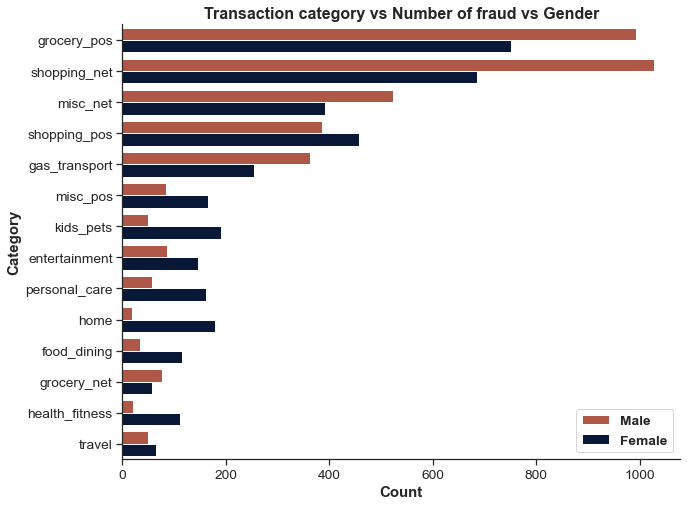

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size and other styling
fig = plt.figure(figsize=(10, 8))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Create count plot with 'category' on the y-axis
g = sns.countplot(y='category',  
                  data=df_fraud,  
                  hue='gender',  # Ensure 'gender' column exists
                  order=df_fraud['category'].value_counts().index)  # Order categories by frequency

# Set title, label, and legend
g.set_title('Transaction category vs Number of fraud vs Gender', fontdict={'fontsize': 16, 'fontweight': 'bold'})
g.set_xlabel('Count', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')
g.legend(prop={'weight': 'bold'})

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Transaction_category_vs_Number_of_Fraud_vs_Gender.png', dpi=300, bbox_inches='tight')


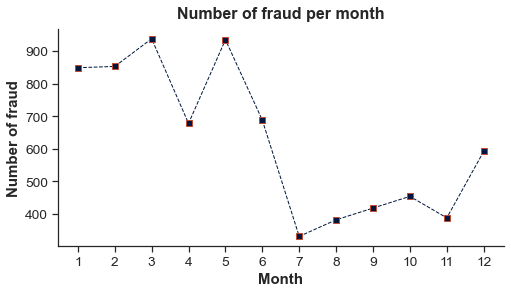

In [104]:
# Create df for number of fraud per month
count_fraud_month = df_fraud.transaction_month.value_counts()
count_fraud_month_df = pd.DataFrame(count_fraud_month).reset_index()
count_fraud_month_df.rename(columns={"index": "month", "transaction_month":"Number of fraud"}, inplace=True)
count_fraud_month_df_sort = count_fraud_month_df.sort_values('month', ascending=True)

# Plot
fig = plt.figure(figsize=(8,4))
plt.plot(count_fraud_month_df_sort.month, 
         count_fraud_month_df_sort['Number of fraud'],
         linestyle='--', 
         marker="s", 
         color='#00163E', 
         markeredgecolor="#C04C36",
         linewidth=1)


# Set title, label, legend 
plt.xlabel("Month", weight='bold', fontsize=15)
plt.ylabel('Number of fraud', weight='bold', fontsize=15)
plt.title("Number of fraud per month", weight='bold', fontsize=16, y=1.02)
plt.xticks(range(1,13,1))

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Month vs Number of fraud.png',dpi=300, bbox_inches='tight')

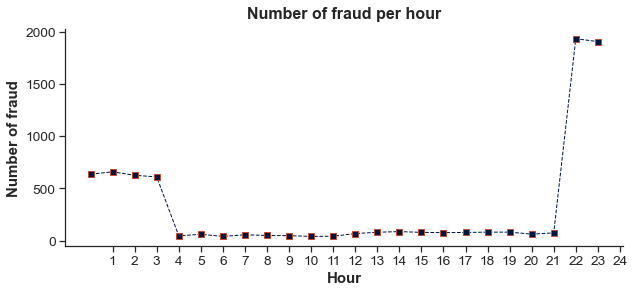

In [105]:
# Create df for number of fraud per hour
count_fraud_hour = df_fraud.transaction_hour.value_counts()
count_fraud_hour_df = pd.DataFrame(count_fraud_hour).reset_index()
count_fraud_hour_df.rename(columns={"index": "hour", "transaction_hour":"Number of fraud"}, inplace=True)
count_fraud_hour_df_sort = count_fraud_hour_df.sort_values('hour', ascending=True)

fig = plt.figure(figsize=(10,4))
plt.plot(count_fraud_hour_df_sort.hour, 
         count_fraud_hour_df_sort['Number of fraud'],
         linestyle='--', 
         marker="s", 
         color='#00163E', 
         markeredgecolor="#C04C36",
         linewidth=1)


# Set title, label, legend 
plt.xlabel("Hour", weight='bold', fontsize=15)
plt.ylabel('Number of fraud', weight='bold', fontsize=15)
plt.title("Number of fraud per hour", weight='bold', fontsize=16, y=1.02)
plt.xticks(range(1,25,1))

# Show plot
plt.show()

# Save as a PNG file with 300 dpi
fig.savefig('./figs/Transaction hour vs Number of fraud.png',dpi=300, bbox_inches='tight')


Larger than 60       2001
Between 50 and 60    1388
Between 40 and 50    1385
Between 30 and 40    1286
Between 20 and 30    1223
Less than 20          223
Name: age_intervals, dtype: int64
count    7506.000000
mean      531.320092
std       390.560070
min         1.060000
25%       245.662500
50%       396.505000
75%       900.875000
max      1376.040000
Name: transaction_amount, dtype: float64


<Figure size 720x432 with 0 Axes>

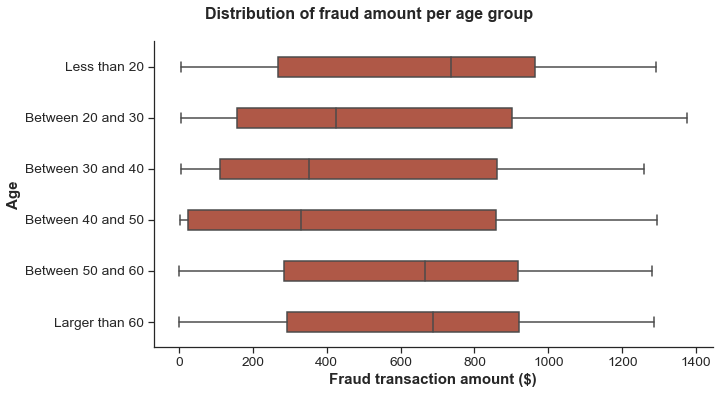

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of 'age_intervals' and 'transaction_amount'
print(df_fraud['age_intervals'].value_counts())
print(df_fraud['transaction_amount'].describe())

# Set figure size for the plot
plt.figure(figsize=(10, 6))

# Set custom style parameters
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)

# Create the box plot
g = sns.catplot(
    y='age_intervals',
    x='transaction_amount',
    data=df_fraud, 
    order=age_order,
    kind='box', 
    width=0.4,
    aspect=2, 
    color='#C04C36'
)

# Set the title and labels
g.fig.suptitle('Distribution of fraud amount per age group', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Fraud transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show the plot
plt.show()

# Save the plot as a PNG file
g.fig.savefig('./figs/Fraud_transaction_amount_vs_Age.png', dpi=300, bbox_inches='tight')


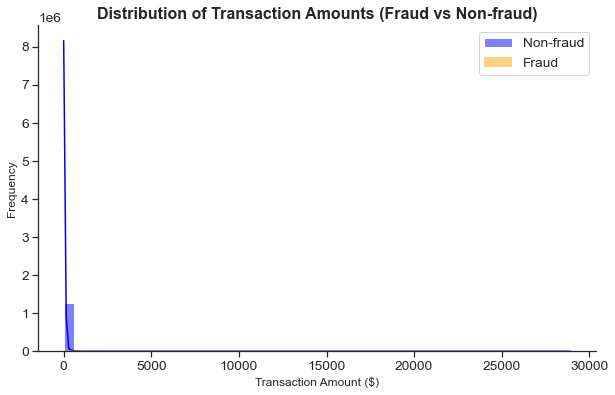

<Figure size 720x432 with 0 Axes>

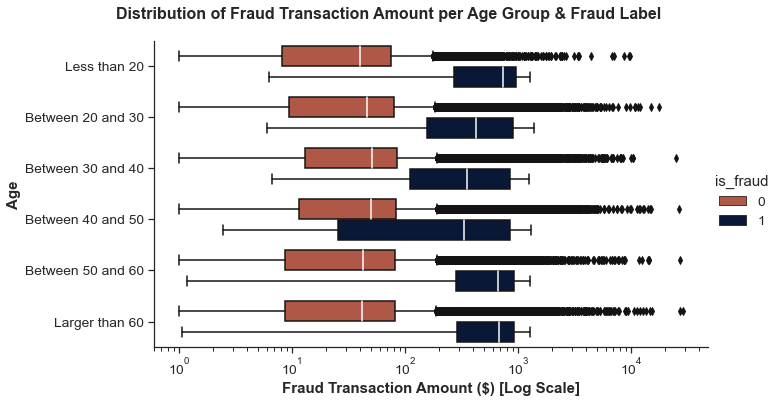

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check distribution of 'transaction_amount' based on fraud
plt.figure(figsize=(10, 6))
sns.histplot(df_clean[df_clean['is_fraud'] == 0]['transaction_amount'], color='blue', kde=True, label='Non-fraud', bins=50)
sns.histplot(df_clean[df_clean['is_fraud'] == 1]['transaction_amount'], color='orange', kde=True, label='Fraud', bins=50)
plt.title('Distribution of Transaction Amounts (Fraud vs Non-fraud)', fontsize=16, fontweight='bold')
plt.xlabel('Transaction Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# Now let's see a boxplot with transformed transaction amounts if needed
plt.figure(figsize=(10,6))

sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(["#C04C36", "#00163E"]))

# Create boxplot with a log-transformed x-axis to handle large values better
g = sns.catplot(
    y='age_intervals',
    x='transaction_amount',
    data=df_clean, 
    hue='is_fraud',
    order=age_order,
    kind='box',
    width=0.8,
    medianprops={"color": "w"},
    aspect=2
)

# Access the axes and set the xscale to log
g.ax.set_xscale('log')

# Set title and labels
g.fig.suptitle('Distribution of Fraud Transaction Amount per Age Group & Fraud Label', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Fraud Transaction Amount ($) [Log Scale]', fontsize=15, fontweight='bold')
g.set_ylabels('Age', fontsize=15, fontweight='bold')

# Show plot
plt.show()

# Save the plot as a PNG file
g.fig.savefig('./figs/Fraud_transaction_amount_vs_Age_vs_Fraud.png', dpi=300, bbox_inches='tight')


<Figure size 720x432 with 0 Axes>

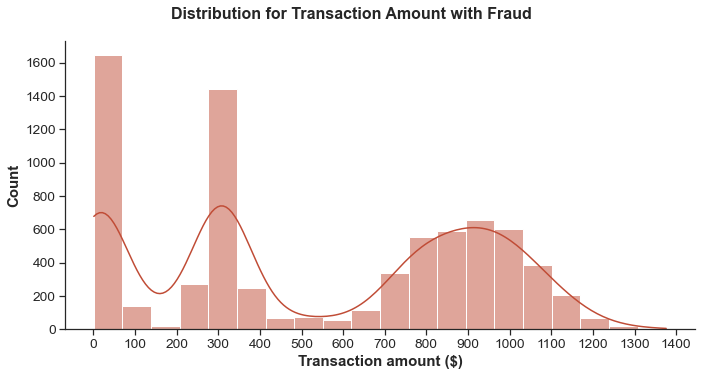

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the default seaborn style
plt.figure(figsize=(10, 6))

colors = ['#C04C36']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create a displot
g = sns.displot(df_fraud['transaction_amount'],
                kde=True,
                bins=20,
                aspect=2)

# Set title, labels, legend
g.fig.suptitle('Distribution for Transaction Amount with Fraud', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Count', fontsize=15, fontweight='bold')
g.set(xticks=list(np.arange(0, 1401, 100)))

# Show plot
plt.show()

# Save the plot as a PNG file using g.fig (not g.figure)
g.fig.savefig('./figs/Distribution_for_Transaction_Amount_with_Fraud.png', dpi=300, bbox_inches='tight')



<Figure size 720x432 with 0 Axes>

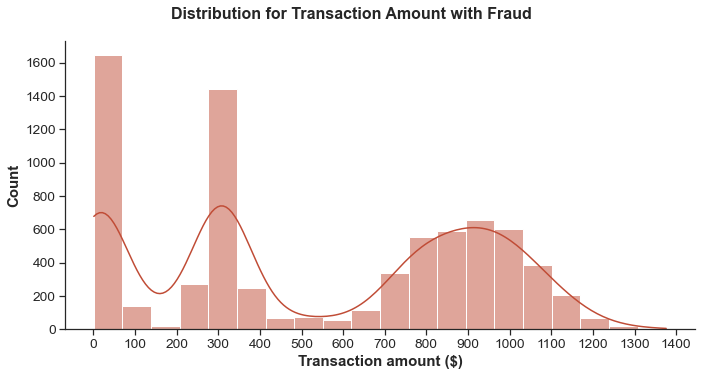

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the default seaborn style
plt.figure(figsize=(10, 6))

colors = ['#C04C36']

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create a displot
g = sns.displot(df_fraud['transaction_amount'],
                kde=True,
                bins=20,
                aspect=2)

# Set title, labels, legend
g.fig.suptitle('Distribution for Transaction Amount with Fraud', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabels('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabels('Count', fontsize=15, fontweight='bold')
g.set(xticks=list(np.arange(0, 1401, 100)))

# Show plot
plt.show()

# Save the plot using g.fig (not g.figure)
g.fig.savefig('./figs/Distribution_for_Transaction_Amount_with_Fraud.png', dpi=300, bbox_inches='tight')



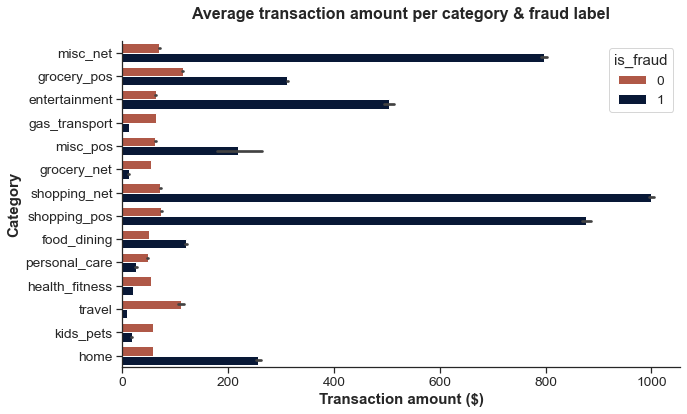

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

colors = ["#C04C36", "#00163E"]
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(colors)

# Create the bar plot (vertical)
g = sns.barplot(data=df,
                x='transaction_amount',
                y='category', 
                hue='is_fraud')

# Set title, label, legend 
g.set_title('Average transaction amount per category & fraud label', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Transaction amount ($)', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Show the plot
plt.show()

# Save the plot as PNG (use g.figure for saving)
g.figure.savefig('./figs/Transaction_amount_vs_Category_vs_Is_fraud.png', dpi=300, bbox_inches='tight')



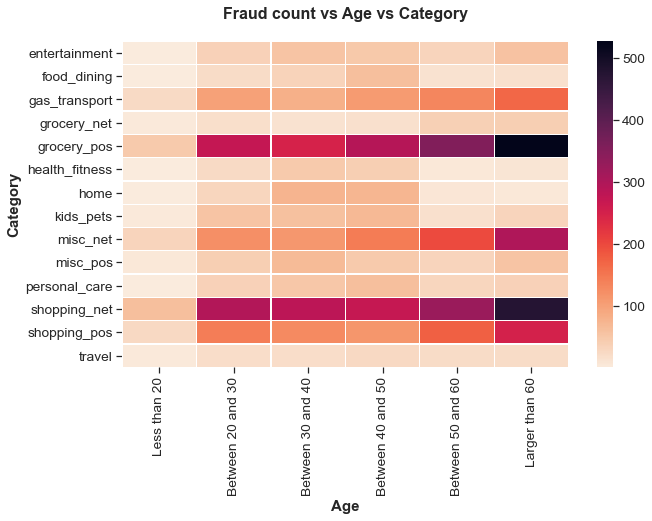

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the age intervals order for columns
age_order = ['Less than 20', 'Between 20 and 30', 'Between 30 and 40', 'Between 40 and 50', 'Between 50 and 60', 'Larger than 60']

# Create a crosstab table of the data (category vs age intervals)
pd_crosstab = pd.crosstab(df_fraud["category"], df_fraud["age_intervals"])

# Reorder the columns using age_order
pd_crosstab_ordered = pd_crosstab[age_order]

# Set figure size for the plot
plt.figure(figsize=(10,6))

# Choose a color palette for the heatmap
cmap = sns.cm.rocket_r

# Set up seaborn theme
sns.set_theme(style="ticks", rc={"axes.spines.right": False, "axes.spines.top": False})
sns.set_context("notebook", font_scale=1.25)

# Plot the heatmap
g = sns.heatmap(pd_crosstab_ordered, 
                cbar=True, 
                cmap=cmap, 
                linewidths=0.3)

# Set title, labels, and legend
g.set_title('Fraud count vs Age vs Category', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Age', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for better visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Save the plot as a PNG file with 300 dpi
g.figure.savefig('./figs/Fraud_count_vs_Age_vs_Category.png', dpi=300, bbox_inches='tight')





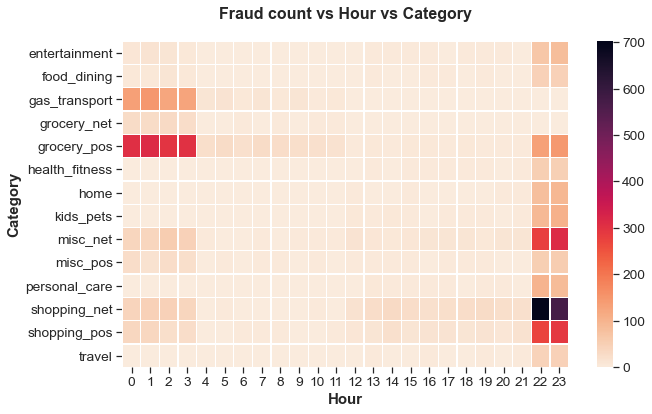

In [178]:
# Create a crosstab table of the data
pd_crosstab_hour_cat = pd.crosstab(df_fraud["category"], df_fraud["transaction_hour"])
pd_crosstab_hour_cat

plt.figure(figsize=(10,6))
cmap = sns.cm.rocket_r
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_context("notebook", font_scale=1.25)
sns.set_palette(sns.color_palette(colors))

# Plot a heatmap of the table
g = sns.heatmap(pd_crosstab_hour_cat, 
                cbar=True, 
                cmap=cmap, 
                linewidths=0.3)

# Set title, label, legend 
g.set_title('Fraud count vs Hour vs Category', fontsize=16, fontweight='bold', y=1.05)
g.set_xlabel('Hour', fontsize=15, fontweight='bold')
g.set_ylabel('Category', fontsize=15, fontweight='bold')

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=0)

plt.show()
g.figure.savefig('./figs/Fraud count vs Hour vs Category.png',dpi=300, bbox_inches='tight')
